In [0]:
from fastai.vision import *

In [0]:
folder="hot_dog"
file='download.csv'

In [0]:
folder='pizza'
file='urls_pizza.csv'

In [0]:
path=Path('/content/')
dest=path/folder
dest.mkdir(parents=True,exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/download.csv'),
 PosixPath('/content/urls_pizza.csv'),
 PosixPath('/content/hot_dog'),
 PosixPath('/content/sample_data')]

In [0]:
classes=['hot_dog','pizza']

In [0]:
download_images(path/file,dest,max_pics=200)

In [0]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_size=500)

In [0]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [14]:
data.classes


['hot_dog', 'pizza']

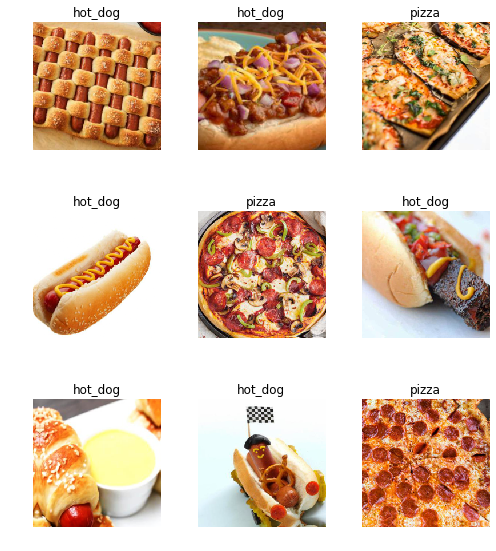

In [15]:
data.show_batch(rows=3,figsize=(7,8))

In [17]:
data.c,len(data.train_ds),len(data.valid_ds)

(2, 142, 35)

In [18]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 21945722.29it/s]


In [29]:
data

ImageDataBunch;

Train: LabelList (142 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pizza,pizza,pizza,pizza,pizza
Path: /content;

Valid: LabelList (35 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pizza,pizza,hot_dog,pizza,pizza
Path: /content;

Test: None

In [24]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.928688,0.661137,0.400000,00:02
1,0.704560,0.242693,0.171429,00:02
2,0.498690,0.124244,0.057143,00:02
3,0.388860,0.071984,0.028571,00:02


In [0]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


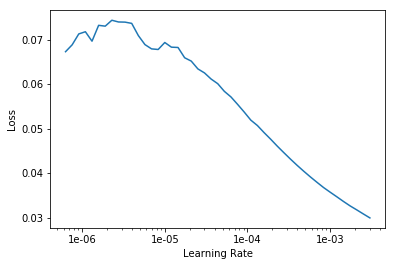

In [27]:
x=learn.recorder.plot()

In [28]:
learn.fit_one_cycle(3,max_lr=slice(2e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.058344,0.040164,0.000000,00:02
1,0.055184,0.025986,0.000000,00:03
2,0.052417,0.022627,0.000000,00:03


In [32]:
img = open_image('check.jpg').resize(224)
learn.predict(img)

(Category pizza, tensor(1), tensor([0.0210, 0.9790]))